In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the customer_churn dataset

In [96]:
customers = pd.read_csv('customer_churn.csv')
customers.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### Initial EDA

In [97]:
customers.shape

(7043, 21)

In [98]:
customers.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
customers.duplicated().sum()

0

In [100]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
customers.shape

(7043, 21)

In [102]:
# some values in the TotalCharges column are blankspace ,so eliminate them and convert column to float 
customers['TotalCharges'] = customers['TotalCharges'].replace(' ', 1)
customers = customers[~(customers['TotalCharges'] == 1)]
customers['TotalCharges'] = customers['TotalCharges'].astype('float')
customers.shape

(7032, 21)

### Exploratory Data Analysis

In [103]:
categorical_columns = customers.select_dtypes('object')
numerical_columns = customers.select_dtypes('number')
print(f"shape of customers dataframe is {customers.shape}")
print(f"shape of categorical dataframe is {categorical_columns.shape}")
print(f"shape of numerical dataframe is {numerical_columns.shape}")

shape of customers dataframe is (7032, 21)
shape of categorical dataframe is (7032, 17)
shape of numerical dataframe is (7032, 4)


In [104]:
categorical_columns = categorical_columns.drop(columns=['customerID'])

In [106]:
categorical_columns.shape

(7032, 16)

In [107]:
numerical_columns.shape

(7032, 4)

In [108]:
categorical_columns = pd.concat([categorical_columns,numerical_columns['SeniorCitizen']],axis=1)
categorical_columns.shape

(7032, 17)

In [109]:
numerical_columns = numerical_columns.drop(columns=['SeniorCitizen'])
numerical_columns.shape

(7032, 3)

In [110]:
categorical_columns.head()

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  Churn  SeniorCitizen  
0    No              0  
1    No              0  
2   Yes              0  
3    No              0  
4   Yes              0

In [111]:
numerical_columns.head()

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

##### Univariate Analysis

In [134]:
numerical_columns.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


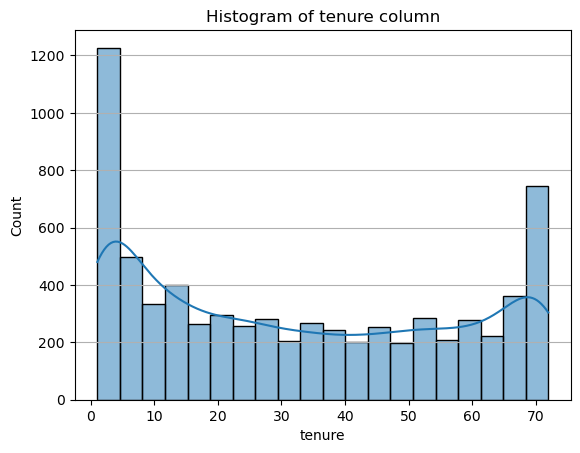

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


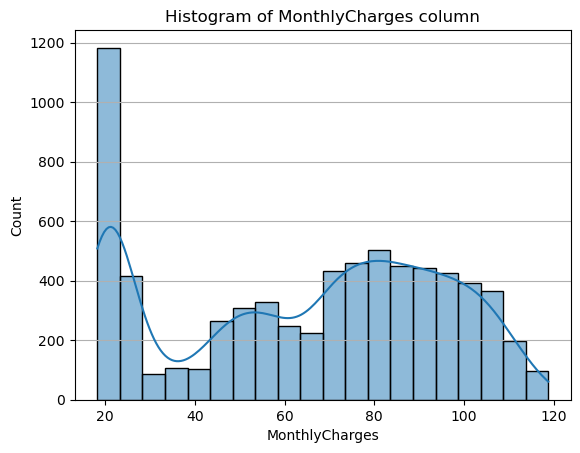

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


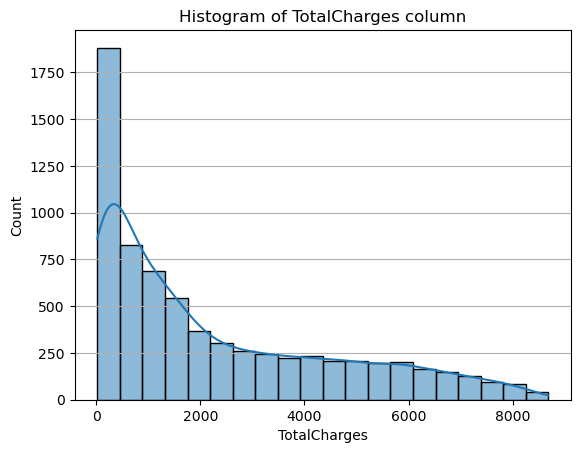

In [114]:
for column in numerical_columns.columns:
    sns.histplot(numerical_columns[column],kde=True,bins=20)
    plt.title(f"Histogram of {column} column")
    plt.grid(axis='y')
    plt.show()

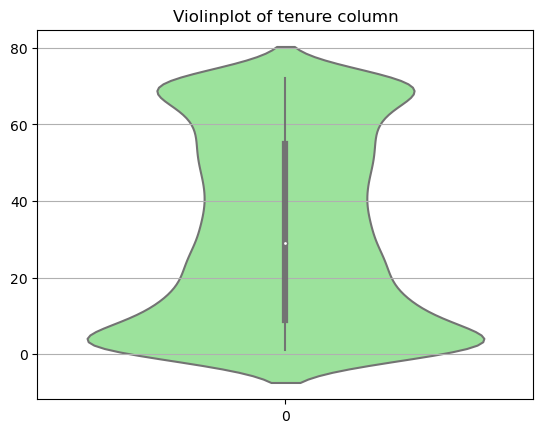

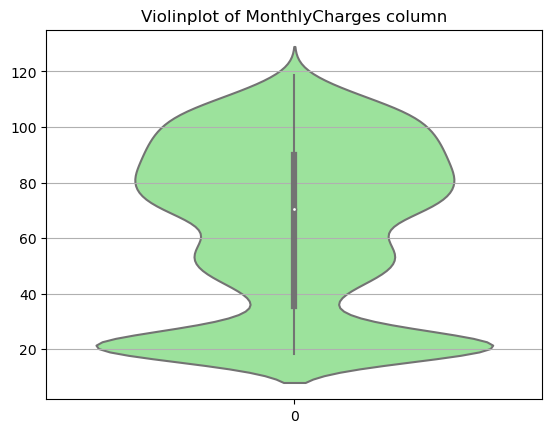

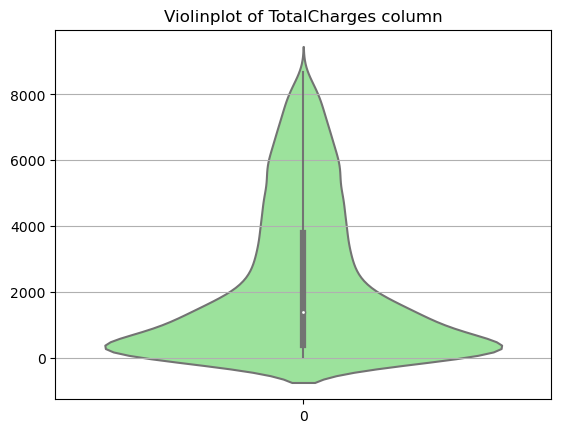

In [130]:
for column in numerical_columns.columns:
    sns.violinplot(numerical_columns[column],color='lightgreen')
    plt.title(f"Violinplot of {column} column")
    plt.grid(axis='y')
    plt.show()

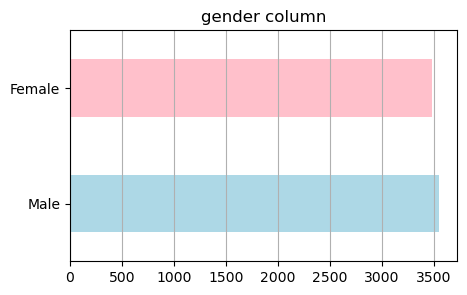

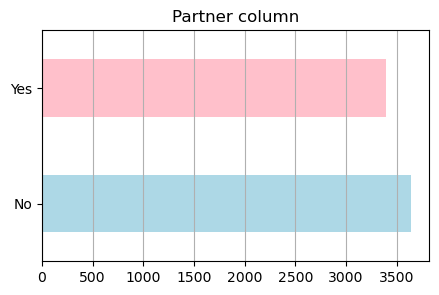

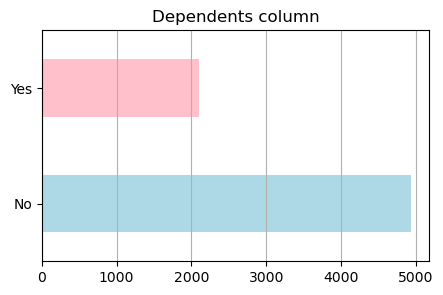

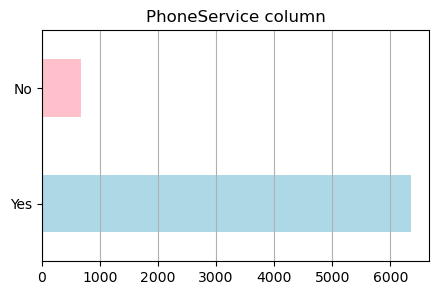

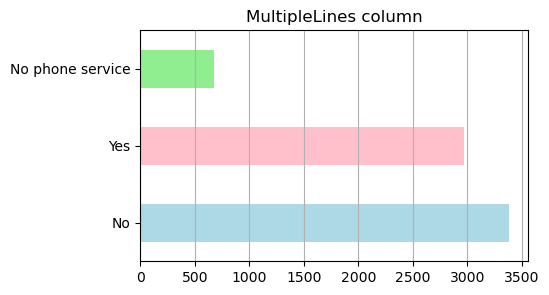

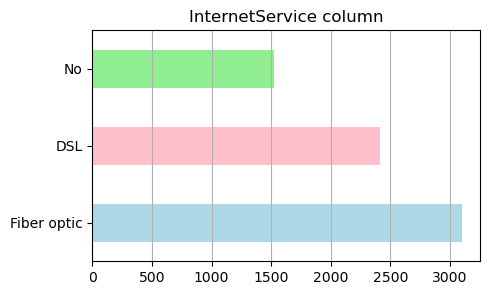

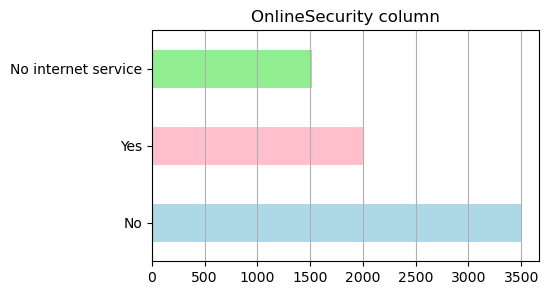

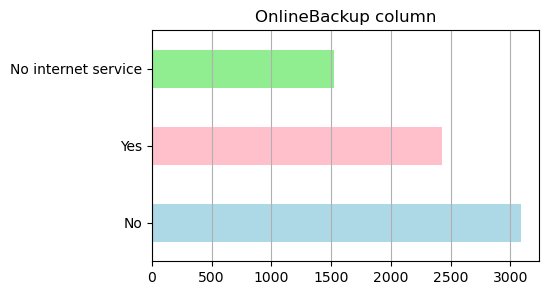

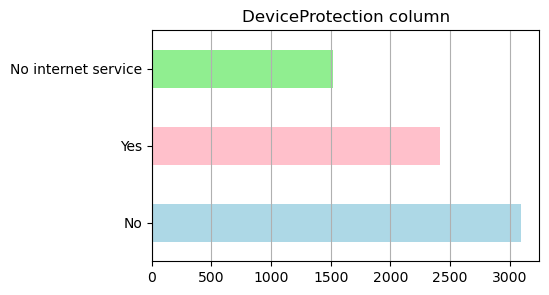

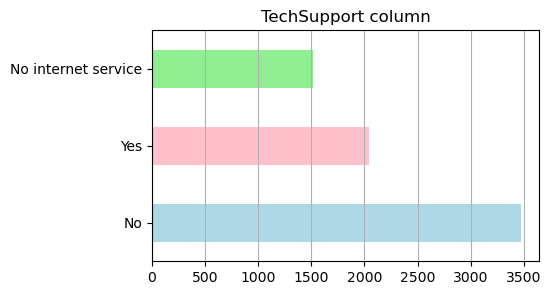

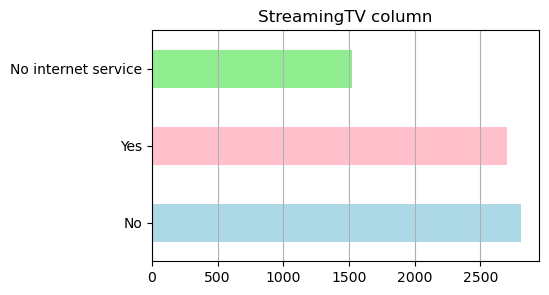

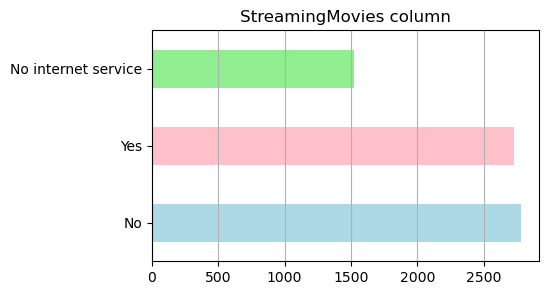

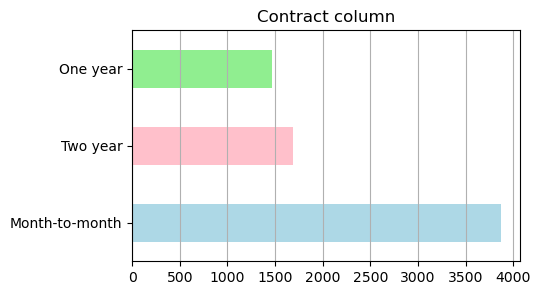

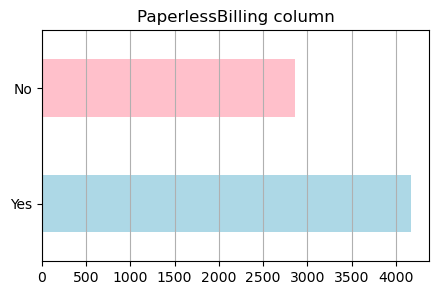

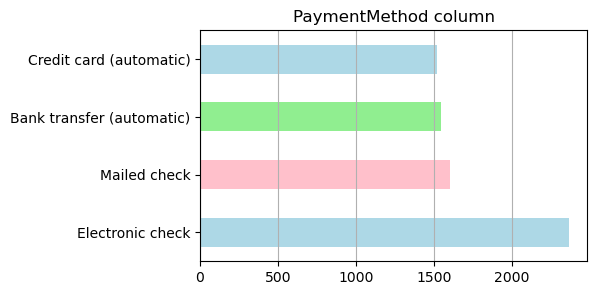

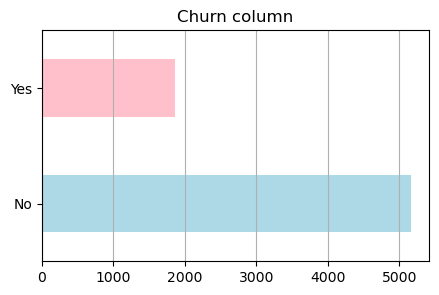

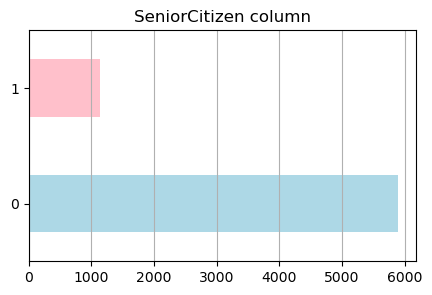

In [125]:
for column in categorical_columns.columns:
    plt.figure(figsize=[5,3])
    categorical_columns[column].value_counts().plot(kind='barh',color=['lightblue','pink','lightgreen'])
    plt.title(f"{column} column")
    plt.ylabel('')
    plt.grid(axis='x')
    plt.show()

##### Multivariate Analysis

In [135]:
corr = numerical_columns.corr()
corr

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000

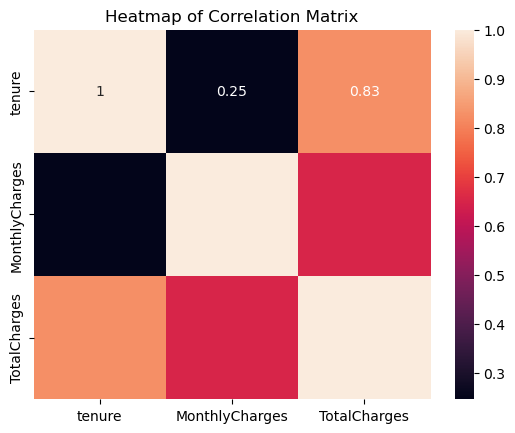

In [139]:
sns.heatmap(corr,annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

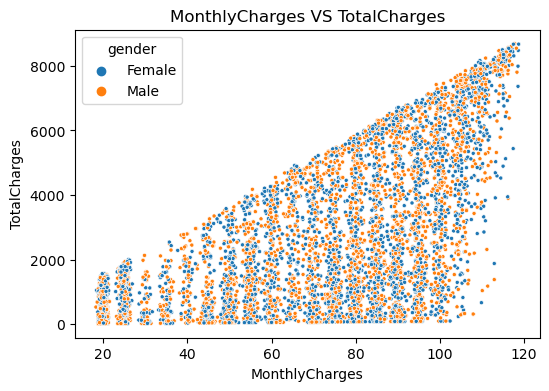

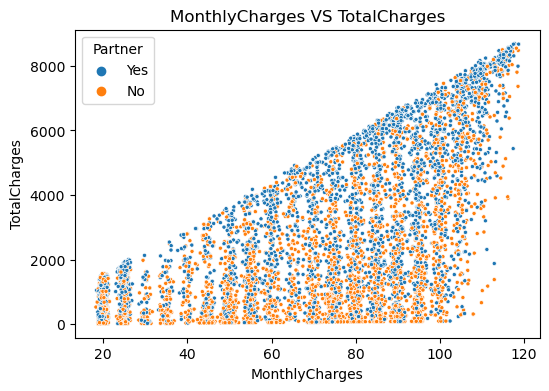

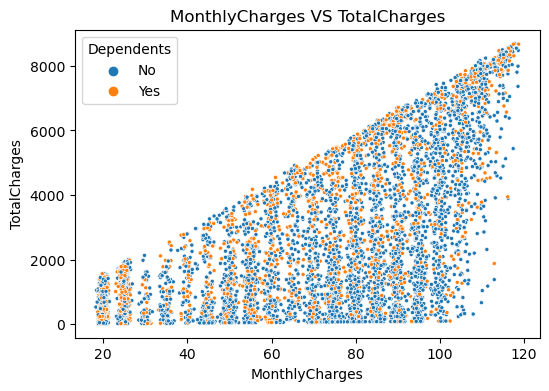

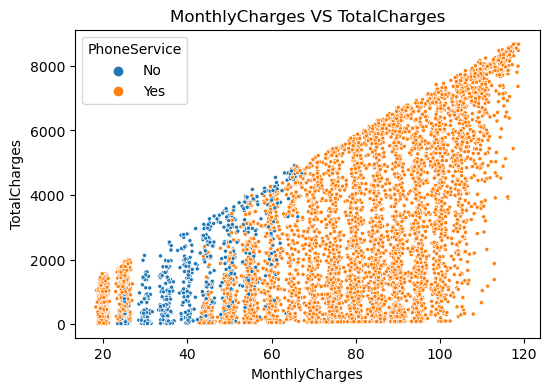

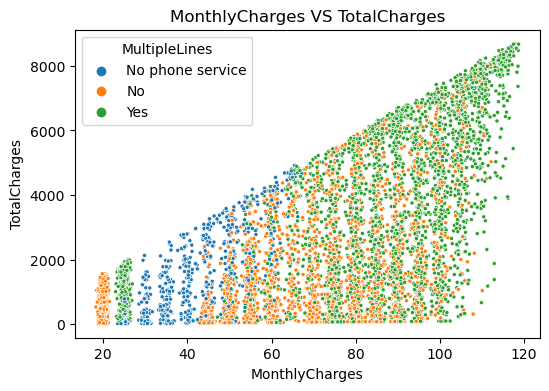

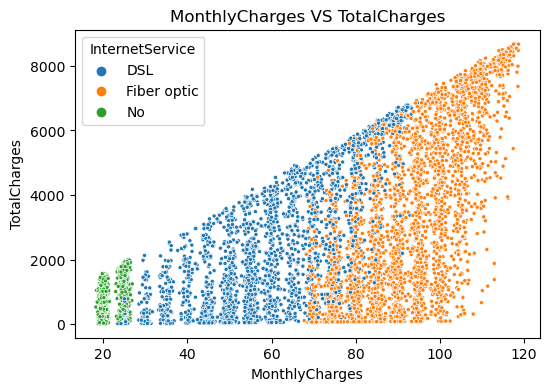

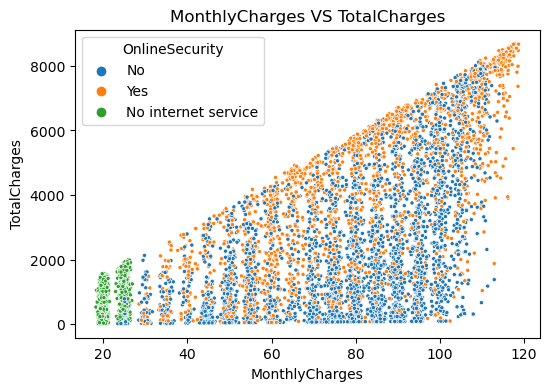

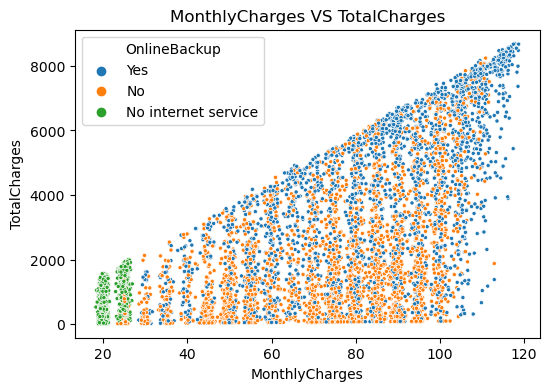

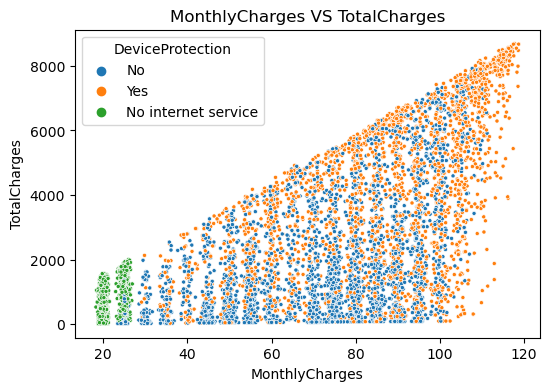

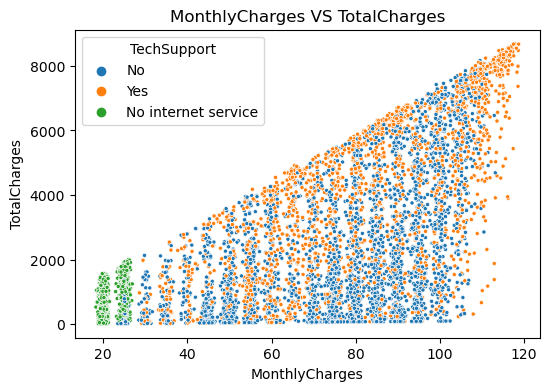

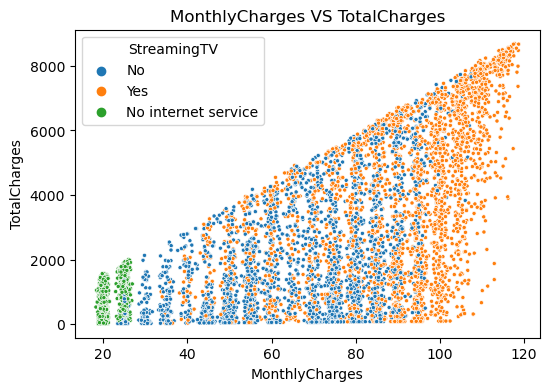

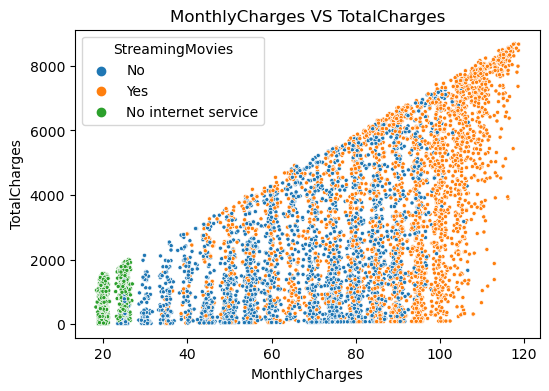

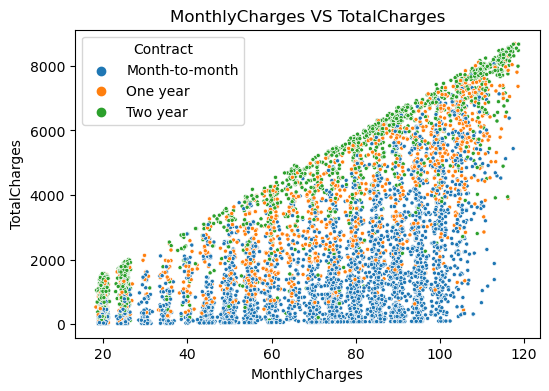

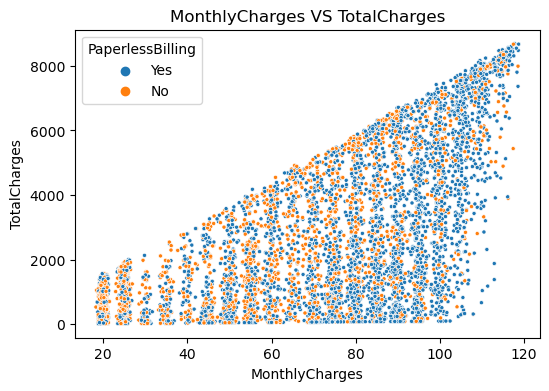

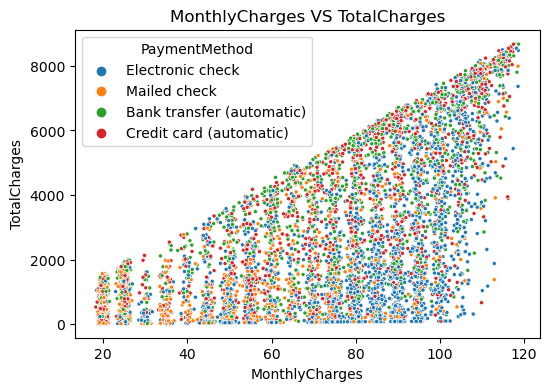

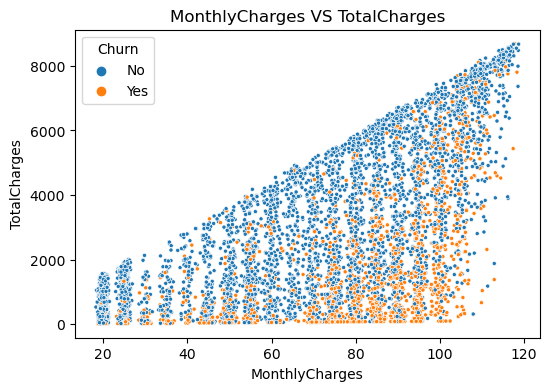

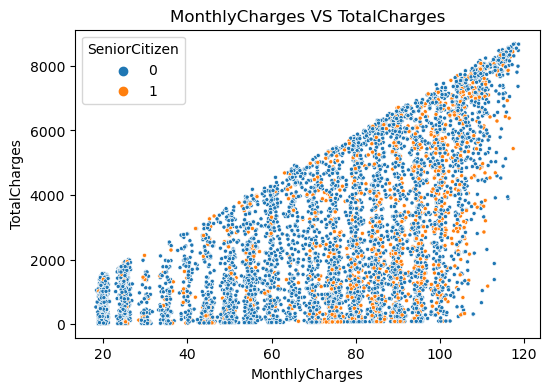

In [144]:
for column in categorical_columns.columns:
    plt.figure(figsize=[6,4])
    sns.scatterplot(x=numerical_columns['MonthlyCharges'],
                    y=numerical_columns['TotalCharges'],
                    hue=categorical_columns[column],marker='.')
    plt.title(f"MonthlyCharges VS TotalCharges")
    plt.show()

In [146]:
categorical_columns.head()

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  Churn  SeniorCitizen  
0    No              0  
1    No              0  
2   Yes              0  
3    No              0  
4   Yes              0

In [152]:
pd.crosstab(index=categorical_columns['gender'],
            columns=categorical_columns['PaymentMethod'],
            values=categorical_columns['Contract'],aggfunc='count',margins=True)

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
gender                                                              
Female                               787                      751   
Male                                 755                      770   
All                                 1542                     1521   

PaymentMethod  Electronic check  Mailed check   All  
gender                                               
Female                     1170           775  3483  
Male                       1195           829  3549  
All                        2365          1604  7032

In [153]:
cts = []
for i in categorical_columns.columns:
    ct = pd.crosstab(index=categorical_columns['gender'],
            columns=categorical_columns[i],
            values=categorical_columns[i],aggfunc='count',margins=True)
    cts.append(ct)

In [162]:
cts[0]

gender  Female    Male   All
gender                      
Female  3483.0     NaN  3483
Male       NaN  3549.0  3549
All     3483.0  3549.0  7032

In [163]:
cts[1]

Partner    No   Yes   All
gender                   
Female   1800  1683  3483
Male     1839  1710  3549
All      3639  3393  7032

In [164]:
cts[2]

Dependents    No   Yes   All
gender                      
Female      2460  1023  3483
Male        2473  1076  3549
All         4933  2099  7032

In [167]:
cts[3]

PhoneService   No   Yes   All
gender                       
Female        329  3154  3483
Male          351  3198  3549
All           680  6352  7032

## Tasks To Be Performed

### 1. Data Manipulation:

In [172]:
customers.shape

(7032, 21)

In [214]:
customers.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

###### Extract the 5th column and store it in ‘customer_5’

In [205]:
customer_5 = customers.iloc[:,5]
customer_5.shape

(7032,)

###### Extract the 15th column and store it in ‘customer_15’

In [206]:
customer_15 = customers.iloc[:,15]
customer_15.shape

(7032,)

###### Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [204]:
senior_male_electronic = customers[(customers['gender']=='Male') & (customers['SeniorCitizen']==1) & (customers['PaymentMethod']=='Electronic check')]
senior_male_electronic.shape

(298, 21)

###### Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

In [203]:
customer_total_tenure = customers[(customers['tenure'] > 70) | (customers['MonthlyCharges']>100)]
customer_total_tenure.shape

(1259, 21)

###### Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [202]:
two_mail_yes = customers[(customers['Contract']=='Two year') & (customers['PaymentMethod']=='Mailed check') & (customers['Churn']=='Yes')]
two_mail_yes.shape

(3, 21)

###### Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

In [201]:
customer_333 = customers.sample(333,random_state=42)
customer_333.shape

(333, 21)

###### Get the count of different levels from the ‘Churn’ column

In [213]:
customers['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### 2. Data Visualization

###### Build a bar-plot for the ’InternetService’ column:

a. Set x-axis label to ‘Categories of Internet Service’

b. Set y-axis label to ‘Count of Categories’

c. Set the title of plot to be ‘Distribution of Internet Service’

d. Set the color of the bars to be ‘orange’

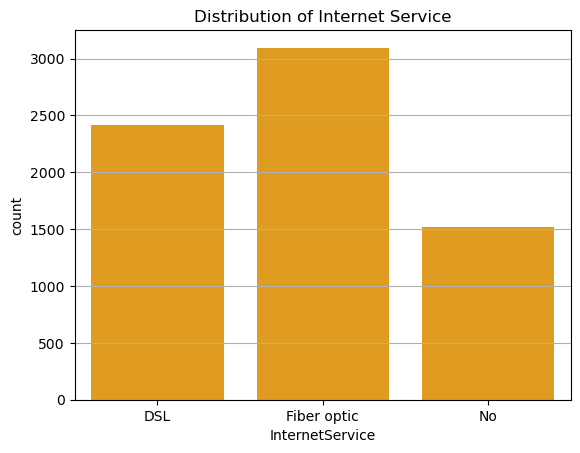

In [216]:
sns.countplot(x=customers['InternetService'],color='orange')
plt.title('Distribution of Internet Service')
plt.grid(axis='y')
plt.show()

###### Build a histogram for the ‘tenure’ column:

a. Set the number of bins to be 30

b. Set the color of the bins to be ‘green’

c. Assign the title ‘Distribution of tenure’

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


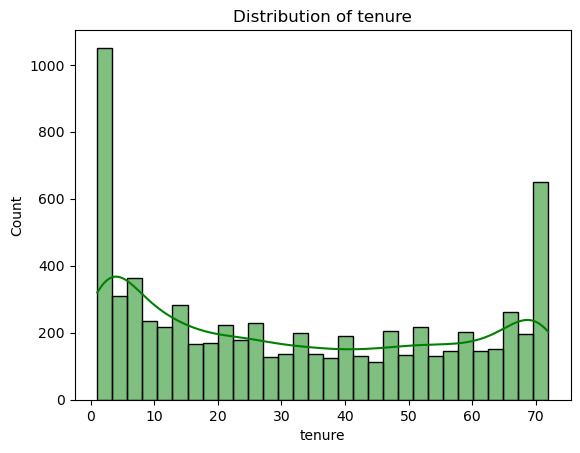

In [218]:
sns.histplot(customers['tenure'],kde=True,bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

###### Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

a. Assign the points a color of ‘brown’

b. Set the x-axis label to ‘Tenure of customer’

c. Set the y-axis label to ‘Monthly Charges of customer’

d. Set the title to ‘Tenure vs Monthly Charges’

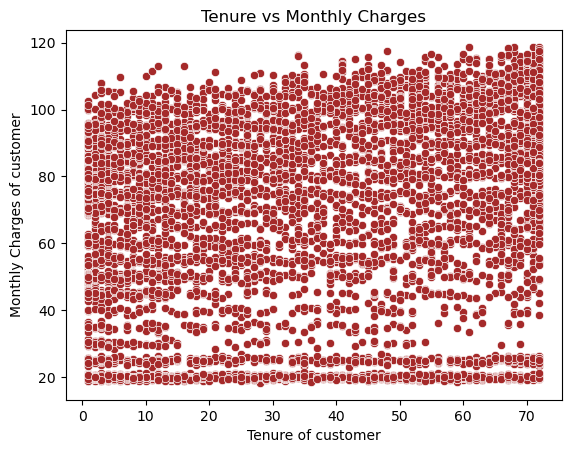

In [223]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=customers, marker='o' , color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

###### Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis

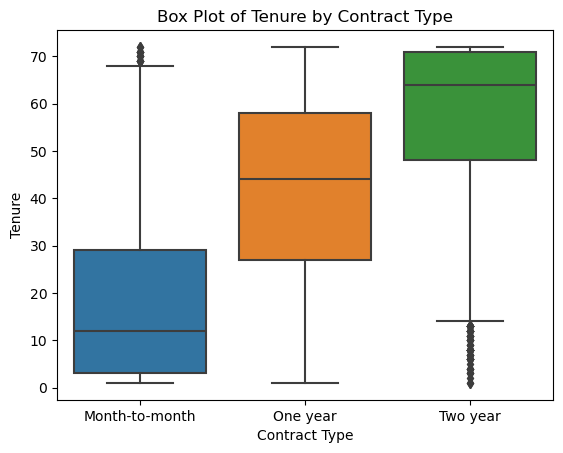

In [224]:
sns.boxplot(x='Contract', y='tenure', data=customers)
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure by Contract Type')
plt.show()

In [226]:
from sklearn.preprocessing import LabelEncoder

In [228]:
for column in categorical_columns.columns:
    label_encoder = LabelEncoder()
    categorical_columns[column] = label_encoder.fit_transform(categorical_columns[column])
    print(f"{column} column is encoded")

gender column is encoded
Partner column is encoded
Dependents column is encoded
PhoneService column is encoded
MultipleLines column is encoded
InternetService column is encoded
OnlineSecurity column is encoded
OnlineBackup column is encoded
DeviceProtection column is encoded
TechSupport column is encoded
StreamingTV column is encoded
StreamingMovies column is encoded
Contract column is encoded
PaperlessBilling column is encoded
PaymentMethod column is encoded
Churn column is encoded
SeniorCitizen column is encoded


In [233]:
custset = pd.concat([categorical_columns,numerical_columns],axis=1)
custset.shape

(7032, 20)

### 3. Linear Regression:

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###### Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
    
a. Divide the dataset into train and test sets in 70:30 ratio.
    
b. Build the model on train set and predict the values on test set

c. After predicting the values, find the root mean square error

d. Find out the error in prediction & store the result in ‘error’

e. Find the root mean square error

In [235]:
x = custset['tenure']
y = custset['MonthlyCharges']

In [240]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [302]:
linear_model = LinearRegression()
linear_model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))
y_pred = linear_model.predict(pd.DataFrame(x_test))
y_pred = y_pred.reshape(2110)
error = mean_squared_error(y_test,y_pred)
print('Mean squared Error is ',round(error,2))

Mean squared Error is  839.3


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


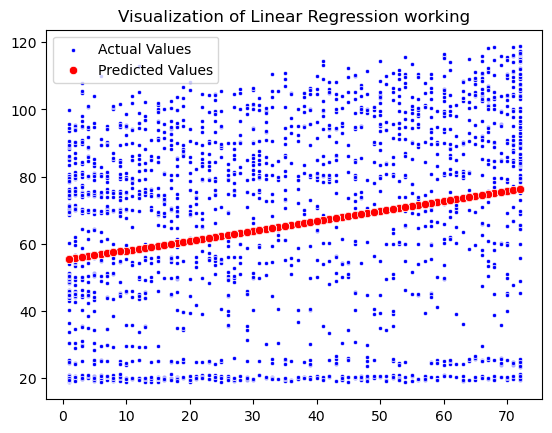

In [306]:
sns.scatterplot(x=x_test, y=y_test, color='blue',marker='.', label='Actual Values')
sns.scatterplot(x=x_test, y=y_pred, color='red', label='Predicted Values')
plt.title('Visualization of Linear Regression working')
plt.show()

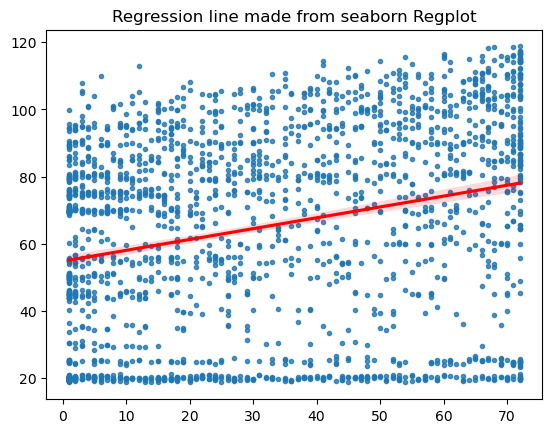

In [308]:
sns.regplot(x=x_test,y=y_test,marker='.',line_kws={'color': 'red'})
plt.title('Regression line made from seaborn Regplot')
plt.show()

### 4. Logistic Regression

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

###### Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
    
a. Divide the dataset in 65:35 ratio
    
b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and get the accuracy score

In [336]:
x = custset['MonthlyCharges']
y = custset['Churn']

In [337]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [338]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

In [339]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)

In [340]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score is ',round(accuracy,2))

Accuracy Score is  0.74


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [341]:
print(confusion_matrix(y_test,y_pred))

[[1824    0]
 [ 638    0]]


###### Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’

a. Divide the dataset in 80:20 ratio
    
b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and get the accuracy score

In [342]:
x = custset[['tenure','MonthlyCharges']]
y = custset['Churn']

In [343]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)

In [345]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score is ',round(accuracy,2))

Accuracy Score is  0.78


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [346]:
print(confusion_matrix(y_test,y_pred))

[[938  95]
 [215 159]]


### 5. Decision Tree

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

###### Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
    
a. Divide the dataset in 80:20 ratio
    
b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [349]:
x = custset['tenure']
y = custset['Churn']

In [350]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)

In [351]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train,y_train)
y_pred = DT_classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score is ',round(accuracy,2))

Accuracy Score is  0.75


In [352]:
print(confusion_matrix(y_test,y_pred))

[[938  95]
 [255 119]]


In [364]:
from sklearn.tree import plot_tree

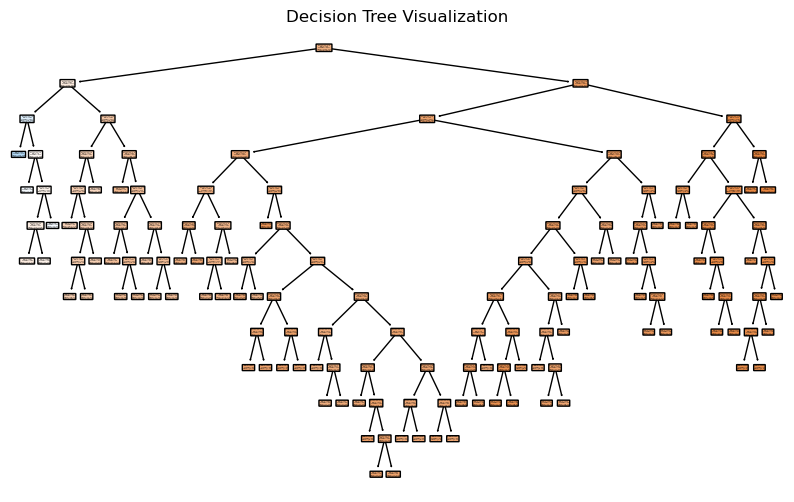

In [365]:
# Plotting the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(DT_classifier, 
          filled=True,  # Color the nodes based on the class
          feature_names=['Feature'],  # Name of the feature
          class_names=['Class 0', 'Class 1'],  # Class names for visualization
          rounded=True)  # Rounded corners for the nodes
plt.title('Decision Tree Visualization')
plt.show()

### 6. Random Forest

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

###### Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
    
a. Divide the dataset in 70:30 ratio
    
b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [367]:
x = custset[['tenure','MonthlyCharges']]
y = custset['Churn']

In [368]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)

In [373]:
RF_classifier = RandomForestClassifier(n_estimators=500)
RF_classifier.fit(x_train,y_train)
y_pred = RF_classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy Score is ',round(accuracy,2))

C:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score is  0.74


In [374]:
print(confusion_matrix(y_test,y_pred))

[[1316  233]
 [ 313  248]]
